In [1]:
import cv2

In [2]:
img1 = cv2.imread('DATA/dog_backpack.png')
img2 = cv2.imread('DATA/watermark_no_copy.png')

#### Convert images from BGR to RGB

In [3]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

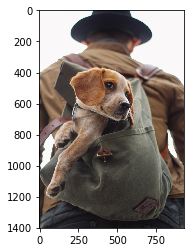

In [5]:
plt.imshow(img1)

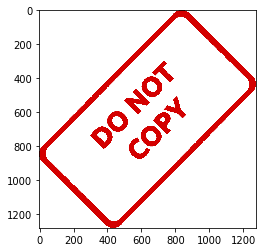

In [6]:
plt.imshow(img2)

In [7]:
print('Size of first image: ', img1.shape, '\nSize of second image:', img2.shape)

Size of first image:  (1401, 934, 3) 
Size of second image: (1280, 1277, 3)


In [8]:
height1 = img1.shape[0]
width1 = img1.shape[1]

#### Blending images of the same size

In [9]:
img1_fixed = cv2.resize(img1, (1200, 1200))
img2_fixed = cv2.resize(img2, (1200, 1200))

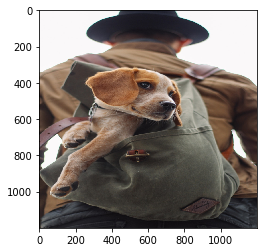

In [10]:
plt.imshow(img1_fixed)

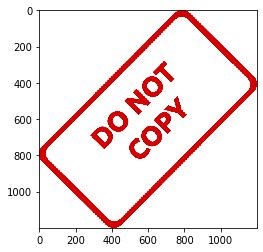

In [11]:
plt.imshow(img2_fixed)

In [12]:
blended = cv2.addWeighted(src1 = img1_fixed, alpha = 0.5, src2 = img2_fixed, beta = 0.5, gamma = 0)

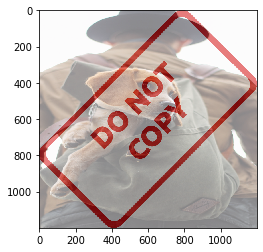

In [13]:
plt.imshow(blended)

In [14]:
blended = cv2.addWeighted(src1 = img1_fixed, alpha = 0.8, src2 = img2_fixed, beta = 0.2, gamma = 0)

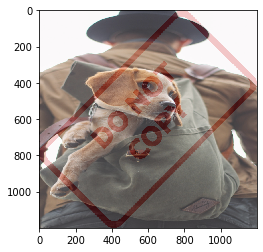

In [15]:
plt.imshow(blended)

In [16]:
img2_img1size = cv2.resize(img2, (width1, height1))

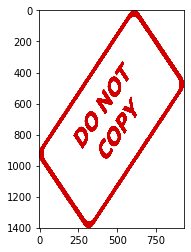

In [17]:
plt.imshow(img2_img1size)

In [18]:
blended = cv2.addWeighted(src1 = img1, alpha = 0.8, src2 = img2_img1size, beta = 0.2, gamma = 0)

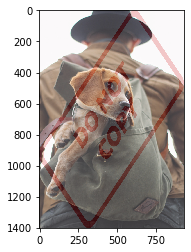

In [19]:
plt.imshow(blended)

#### Overlay a small image on top of a larger image (No blending)

In [20]:
img2_small = cv2.resize(img2, (600, 600))

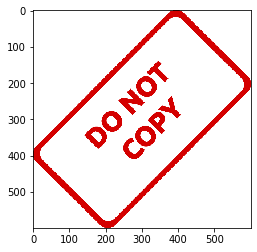

In [21]:
plt.imshow(img2_small)

In [22]:
large_img = img1
small_img = img2_small

In [23]:
x_offset = 0
y_offset = 0

In [24]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [25]:
print('x_end:', x_end, 'y_end', y_end)

x_end: 600 y_end 600


In [26]:
large_img[y_offset:y_end, x_offset:x_end] = small_img

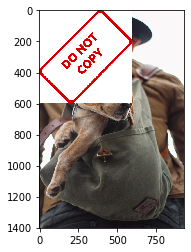

In [27]:
plt.imshow(large_img)

#### Blend together images of different sizes

In [28]:
img1 = cv2.imread('DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [29]:
img1.shape 

(1401, 934, 3)

In [30]:
height1 = img1.shape[0]
width1 = img1.shape[1]
x_offset = width1 - 600
y_offset = height1 - 600

In [31]:
img2 = cv2.resize(img2, (600, 600))

In [32]:
img2.shape

(600, 600, 3)

In [33]:
rows, cols, channels = img2.shape

In [34]:
roi = img1[y_offset: height1, x_offset: width1] 

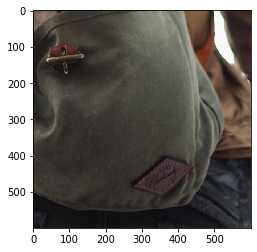

In [35]:
plt.imshow(roi)

In [36]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

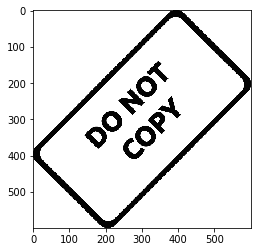

In [37]:
plt.imshow(img2gray, cmap = 'gray')

In [38]:
mask_inverse = cv2.bitwise_not(img2gray)

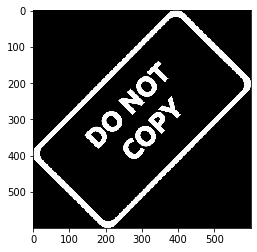

In [39]:
plt.imshow(mask_inverse, cmap='gray')

In [40]:
mask_inverse.shape

(600, 600)

In [41]:
import numpy as np

In [42]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [43]:
white_background.shape

(600, 600, 3)

In [44]:
white_background

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [45]:
background = cv2.bitwise_or(white_background, white_background, mask=mask_inverse)

In [46]:
background.shape

(600, 600, 3)

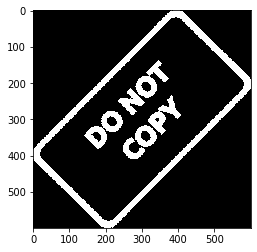

In [47]:
plt.imshow(background)

In [48]:
foreground = cv2.bitwise_or(img2, img2, mask=mask_inverse)

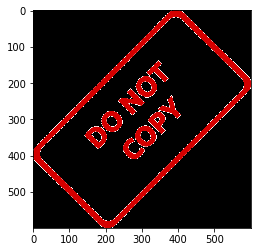

In [49]:
plt.imshow(foreground)

In [50]:
final_roi = cv2.bitwise_or(roi, foreground)

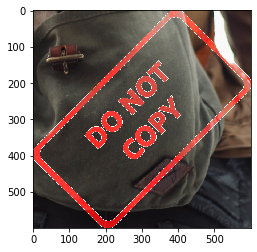

In [51]:
plt.imshow(final_roi)

In [52]:
large_img = img1
small_img = final_roi

In [53]:
large_img[y_offset: y_offset + small_img.shape[0], x_offset: x_offset + small_img.shape[1]] = small_img

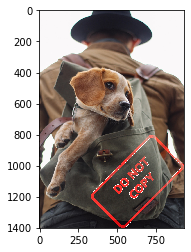

In [54]:
plt.imshow(large_img)